In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Берём данные из CSV-файлов и загружаем их в DataFrame объекты для тренировки и обучения модели
train_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [ ]:
# Вывод информации о размерах тренировочного и тестовых наборов из CSV-файлов
# Fashion MNIST - датасэт для обучения и тестирования моделей, состоящий из изображений одежды, разделённых на 10 категорий
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


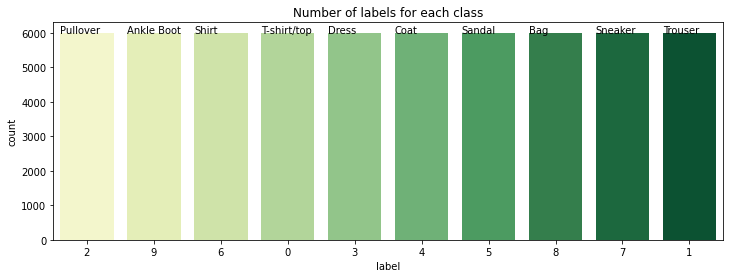

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Определение меток
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Функция для построения гистограммы количества меток для каждого класса
def plot_label_per_class(data):
    f, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index, palette='YlGn')
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height() + 0.1))
    plt.show()

plot_label_per_class(train_data)


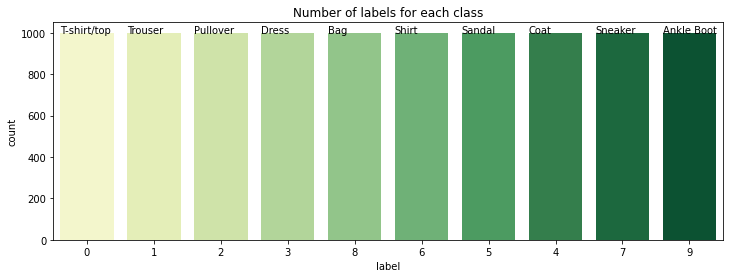

In [ ]:
# Вывод гистограммы для тестовых данных
plot_label_per_class(test_data)

In [ ]:
def sample_images_data(data):
    # Пустой список для сбора некоторых примеров
    sample_images = []
    sample_labels = []

    # Перебираем ключи словаря меток, определенного в предыдущей ячейке
    for k in labels.keys():
        # Получаем четыре примера для каждой категории
        samples = data[data["label"] == k].head(4)
        # Добавляем примеры в список примеров
        for j, s in enumerate(samples.values):
            # Первый столбец содержит метки, поэтому индекс должен начинаться с 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Общее количество примеров изображений для отображения: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)


Total number of sample images to plot:  40


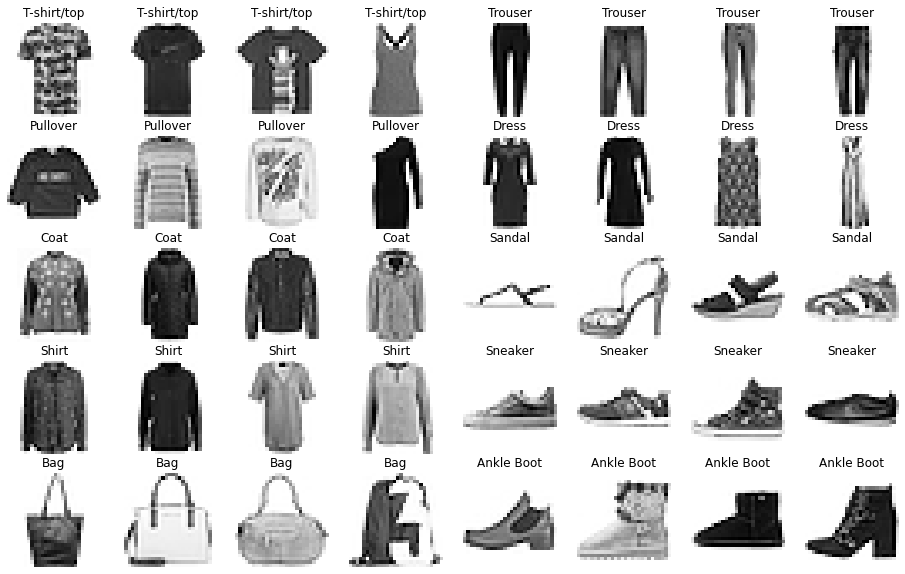

In [ ]:
def plot_sample_images(data_sample_images, data_sample_labels, cmap="Greys"):
    # Отображаем примеры изображений
    f, ax = plt.subplots(5, 8, figsize=(16, 10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap) # Отображение изображения в нужной ячейке
        ax[i//8, i%8].axis('off') # Отключение отображения осей изображений
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]]) # Заголовки для каждого изображения
    plt.show()

plot_sample_images(train_sample_images, train_sample_labels, "Greys")


Total number of sample images to plot:  40


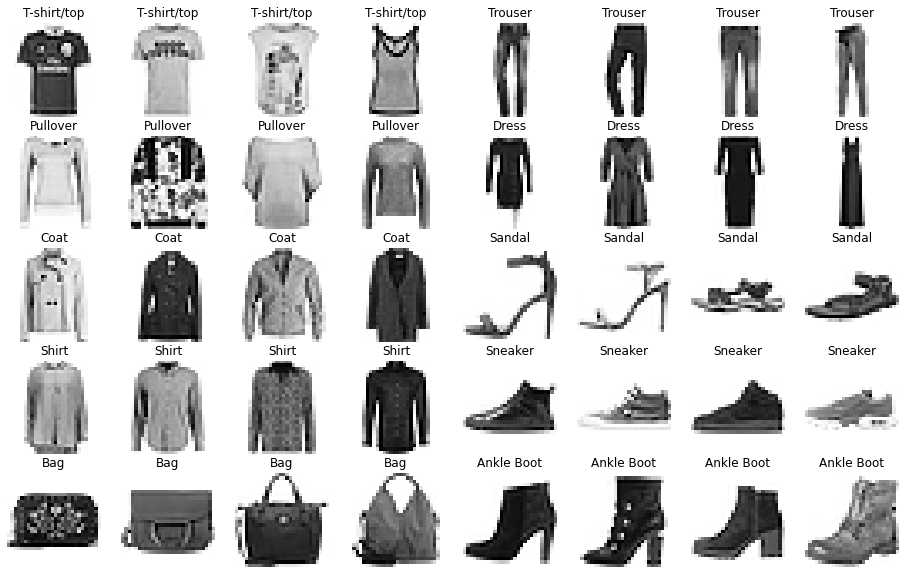

In [ ]:
# Отображение для тестовых данных
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels,"Greys")   

# **ResNet 18**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report
from torchvision.datasets import FashionMNIST
from torchvision.models import resnet18

# Используем ResNet18 как базовую модель
resnet = resnet18(pretrained=True)  # Загружаем предобученные веса
resnet.fc = nn.Linear(resnet.fc.in_features, 10)  # Настраиваем для 10 классов

# Переносим модель на GPU, если доступно
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


In [ ]:
# Трансформация данных
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Изменяем размер изображения для ResNet
    transforms.Grayscale(num_output_channels=3),  # Преобразуем в трехканальное изображение
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Нормализация для трех каналов
])


# Загрузка данных
train_dataset = FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.33MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.18MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
from torch.utils.data import random_split

In [ ]:
train_size = int(0.8 * len(train_dataset))  # 80% для обучения
val_size = len(train_dataset) - train_size  # Оставшиеся 20% для проверки
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss() # Измерение ошибку модели
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.001) # Метод обновления веса на основе вычисленной ошибки

In [ ]:
def compute_accuracy(loader):
    # Инициализация счетчиков правильных и общих предсказаний
    correct = 0
    total = 0

    # Отключение вычисления градиентов для уменьшения использования памяти и ускорения вычислений
    with torch.no_grad():
        for images, labels in loader:
            # Перемещение изображений и меток на устройство (GPU или CPU)
            images, labels = images.to(device), labels.to(device)

            # Прямой проход через модель для получения предсказаний
            outputs = resnet(images)

            # Получение предсказанных меток
            _, predicted = outputs.max(1)

            # Обновление общего счетчика на количество меток в текущей партии
            total += labels.size(0)

            # Обновление счетчика правильных предсказаний на количество правильно предсказанных меток в текущей партии
            correct += predicted.eq(labels).sum().item()

    return 100 * correct / total


In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Обучение
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Валидация
    val_accuracy = compute_accuracy(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Accuracy: {100*correct/total:.2f}%, Validation Accuracy: {val_accuracy:.2f}%")

Epoch [1/10], Loss: 0.3256, Train Accuracy: 88.20%, Validation Accuracy: 91.05%
Epoch [2/10], Loss: 0.2189, Train Accuracy: 91.95%, Validation Accuracy: 92.63%
Epoch [3/10], Loss: 0.1850, Train Accuracy: 93.16%, Validation Accuracy: 92.86%
Epoch [4/10], Loss: 0.1577, Train Accuracy: 94.31%, Validation Accuracy: 93.01%
Epoch [5/10], Loss: 0.1322, Train Accuracy: 95.19%, Validation Accuracy: 93.72%
Epoch [6/10], Loss: 0.1071, Train Accuracy: 96.10%, Validation Accuracy: 93.67%
Epoch [7/10], Loss: 0.0826, Train Accuracy: 96.97%, Validation Accuracy: 93.72%
Epoch [8/10], Loss: 0.0651, Train Accuracy: 97.64%, Validation Accuracy: 93.37%
Epoch [9/10], Loss: 0.0492, Train Accuracy: 98.19%, Validation Accuracy: 93.72%
Epoch [10/10], Loss: 0.0375, Train Accuracy: 98.69%, Validation Accuracy: 93.92%


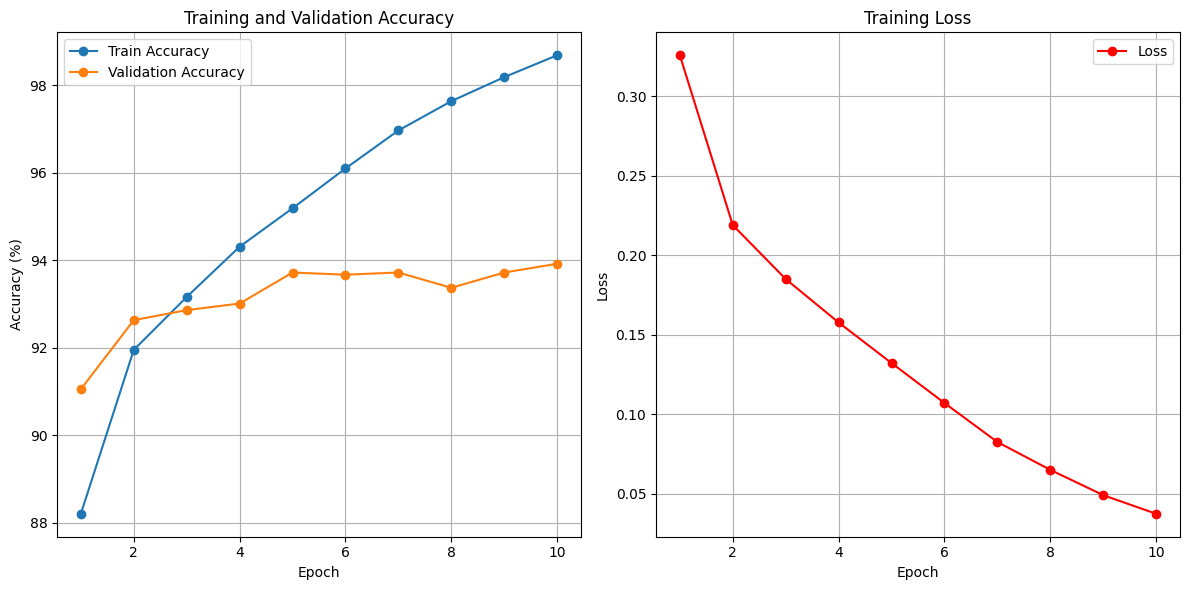

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
epochs = list(range(1, 11))
train_accuracies = [88.20, 91.95, 93.16, 94.31, 95.19, 96.10, 96.97, 97.64, 98.19, 98.69]
val_accuracies = [91.05, 92.63, 92.86, 93.01, 93.72, 93.67, 93.72, 93.37, 93.72, 93.92]
losses = [0.3256, 0.2189, 0.1850, 0.1577, 0.1322, 0.1071, 0.0826, 0.0651, 0.0492, 0.0375]

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, losses, label="Loss", marker='o', color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Hyperparameter tuning

In [ ]:
from torchvision.models import resnet18

class AdvancedResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AdvancedResNet, self).__init__()
        # Файнтюннинг модели
        self.resnet = resnet18(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = True 

        # Replace FC with a custom head
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):   
        return self.resnet(x)

# Инициализация модели
advanced_resnet = AdvancedResNet(num_classes=10).to(device)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(advanced_resnet.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


In [ ]:
num_epochs = 15
best_val_accuracy = 0

for epoch in range(num_epochs):
    advanced_resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = advanced_resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct / total

    
    advanced_resnet.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = advanced_resnet(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_accuracy = 100 * correct / total
    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%")

    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(advanced_resnet.state_dict(), 'best_advanced_resnet.pth')

print(f"Best Validation Accuracy: {best_val_accuracy:.2f}%")


Epoch [1/15], Loss: 0.3693, Train Accuracy: 87.34%, Validation Accuracy: 91.53%
Epoch [2/15], Loss: 0.2435, Train Accuracy: 91.52%, Validation Accuracy: 90.36%
Epoch [3/15], Loss: 0.1992, Train Accuracy: 92.99%, Validation Accuracy: 91.81%
Epoch [4/15], Loss: 0.1691, Train Accuracy: 94.19%, Validation Accuracy: 93.82%
Epoch [5/15], Loss: 0.1335, Train Accuracy: 95.40%, Validation Accuracy: 93.88%
Epoch [6/15], Loss: 0.0938, Train Accuracy: 96.72%, Validation Accuracy: 94.67%
Epoch [7/15], Loss: 0.0573, Train Accuracy: 98.06%, Validation Accuracy: 94.78%
Epoch [8/15], Loss: 0.0264, Train Accuracy: 99.21%, Validation Accuracy: 94.53%
Epoch [9/15], Loss: 0.0088, Train Accuracy: 99.77%, Validation Accuracy: 94.97%
Epoch [10/15], Loss: 0.0037, Train Accuracy: 99.93%, Validation Accuracy: 94.96%
Epoch [11/15], Loss: 0.0030, Train Accuracy: 99.95%, Validation Accuracy: 94.97%
Epoch [12/15], Loss: 0.0027, Train Accuracy: 99.96%, Validation Accuracy: 94.95%
Epoch [13/15], Loss: 0.0044, Train Ac

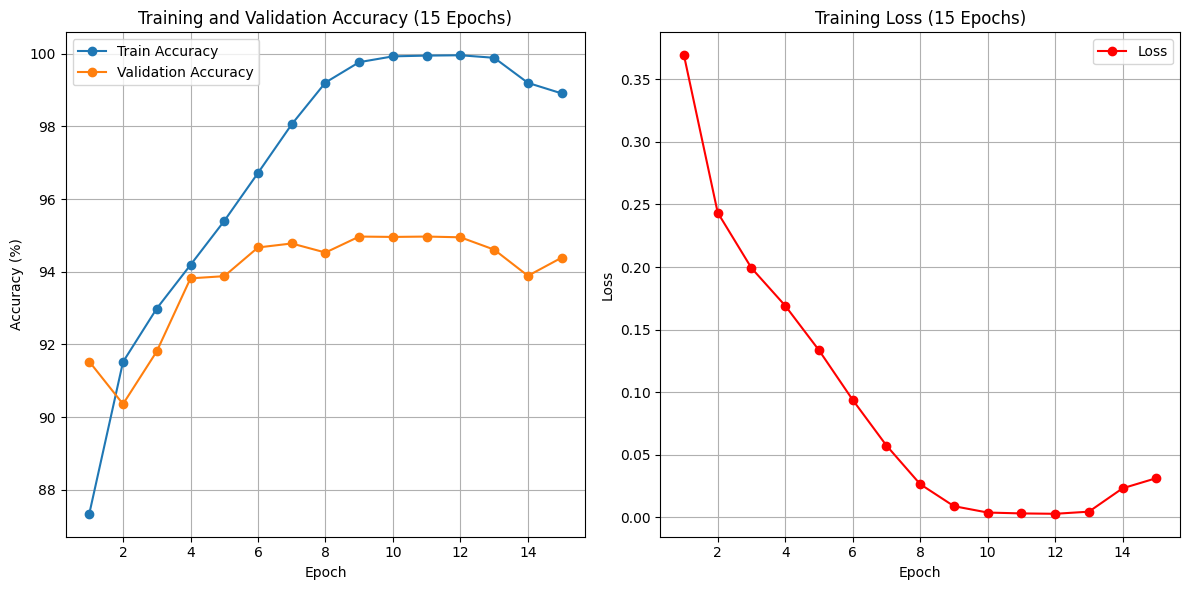

In [ ]:
epochs_15 = list(range(1, 16))
train_accuracies_15 = [
    87.34, 91.52, 92.99, 94.19, 95.40, 96.72, 98.06, 99.21, 99.77, 99.93,
    99.95, 99.96, 99.89, 99.20, 98.91
]
val_accuracies_15 = [
    91.53, 90.36, 91.81, 93.82, 93.88, 94.67, 94.78, 94.53, 94.97, 94.96,
    94.97, 94.95, 94.61, 93.89, 94.39
]
losses_15 = [
    0.3693, 0.2435, 0.1992, 0.1691, 0.1335, 0.0938, 0.0573, 0.0264, 0.0088,
    0.0037, 0.0030, 0.0027, 0.0044, 0.0231, 0.0312
]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_15, train_accuracies_15, label="Train Accuracy", marker='o')
plt.plot(epochs_15, val_accuracies_15, label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy (15 Epochs)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_15, losses_15, label="Loss", marker='o', color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (15 Epochs)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
